# How long is the blacklist?
> A Bayesian approach

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian]
- image: images/2020-03-13-RQ-Decomposition-In-Practice/header.jpg


## Overview

I'm in the process of learning French, and as part of my language learning journey, I'm slowly working my way through *The Blacklist* on Netflix. 

The premise of the show involves an antihero played by James Spader working his way through a list of nefarious characters, taking them down one at a time.

Out of idle intellectual curiosity, I was curious about how many names are on the list, based on the sample of names that are given. It's actually an interesting problem we can solve using Bayesian analysis, more commonly known as the "German Tank Problem", or the "Locomotive Problem".


It's also an interesting into into Bayesian analysis. We are trying to infer an unknown quantity (The number of people on the list), while only being able to observe samples from this distribution.

## Bayes in Brief.

There are many other, far better blog posts which cover this topic, in particular this [one](https://www.isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/).

Now, with that out of the way, let's talk about the problem at hand, and how we can solve it with Bayesian analysis.


We have some evidence, $E$, which is what we actually obsever. In this case, it's the index in the black list that we find out each episode. IE, in first episode, it's entry number $52$.

Then we have what we want to know, an estimate of the length of the blacklist, given the evidence we have observed. This is the probability of a hypothesis, given the evidence $P(H|E)$. It's a probability, because we don't know for sure how long the blacklist is, given what we have observed, but we can work out how confident we can be about each potential option.

Now, given that $P(H|E)$ is what we want, we can use *Baye's Formula* to find it. 

$P(H|E) = \frac{P(E|H) P(H)}{P(E)}$

We need three more pieces of the puzzle, $P(E|H)$, $P(H)$ and $P(E)$.

Now, $P(E|H)$ is the probability of the Evidence, given the Hypothesis. This term is also known as the *Likelyhood*, and is the term which I found most confusing while initially learning about Bayesian analysis. In this case, it's almost confusingly simple.

$P(H)$ is our prior belief about what the possible hypothesis could be. In this case, it's long long we plausibly think the Blacklist could be. In practice, we know it has to be as long as any of the entries we have observed. Much of the criticism of Baysian analysis comes from the fact we can inject our own beliefs into the process. In this case, I don't have a strong belief about the length of the Blacklist, but it's reasonable to assume that it's probably less than 500 entries long. 

Let's assume that the Blacklist is of length $N$. Let's also assume that any given entry is as likely to be the subject of each episode as any other. Then the probability of drawing any given number, is $\frac{1}{N}$. This is the likelihood. Also note the subtle point that obviously that N has to be at least as large as the number we have drawn. 

Finally, we have $P(E)$, which is the probability of the evidence. This is just a normalisation factor, which is often ignored. 

Let's get down to business, fortunately Wikipedia has all the data we need.

| No. overall | No. in season | Title                      | Blacklist guide | Directed by       | Written by                                                                                            | Original air date  | US viewers(millions) |
|------------|--------------|----------------------------|----------------|-------------------|-------------------------------------------------------------------------------------------------------|--------------------|----------------------|
| 1          | 1            | "Pilot"                    | No. 52         | Joe Carnahan      | Jon Bokenkamp                                                                                         | September 23, 2013 | 12.58[10]            |
| 2          | 2            | "The Freelancer"           | No. 145        | Jace Alexander    | Jon Bokenkamp                                                                                         | September 30, 2013 | 11.35[11]            |
| 3          | 3            | "Wujing"                   | No. 84         | Michael Watkins   | Lukas Reiter                                                                                          | October 7, 2013    | 11.18[12]            |
| 4          | 4            | "The Stewmaker"            | No. 161        | Vince Misiano     | Patrick Massett & John Zinman                                                                         | October 14, 2013   | 10.93[13]            |
| 5          | 5            | "The Courier"              | No. 85         | Nick Gomez        | John C. Kelley                                                                                        | October 21, 2013   | 10.44[14]            |
| 6          | 6            | "Gina Zanetakos"           | No. 152        | Adam Arkin        | Wendy West                                                                                            | October 28, 2013   | 10.51[15]            |
| 7          | 7            | "Frederick Barnes"         | No. 47         | Michael Watkins   | J. R. Orci                                                                                            | November 4, 2013   | 10.34[16]            |
| 8          | 8            | "General Ludd"             | No. 109        | Stephen Surjik    | Amanda Kate Shuman                                                                                    | November 11, 2013  | 10.69[17]            |
| 9          | 9            | "Anslo Garrick"            | No. 16         | Joe Carnahan      | Story by : Joe Carnahan & Jason George Teleplay by : Joe Carnahan                                     | November 25, 2013  | 10.96[18]            |
| 10         | 10           | "Anslo Garrick Conclusion" | No. 16         | Michael Watkins   | Lukas Reiter & J. R. Orci                                                                             | December 2, 2013   | 11.67[19]            |
| 11         | 11           | "The Good Samaritan"       | No. 106        | Dan Lerner        | Brandon Margolis & Brandon Sonnier                                                                    | January 13, 2014   | 9.35[20]             |
| 12         | 12           | "The Alchemist"            | No. 101        | Vince Misiano     | Anthony Sparks                                                                                        | January 20, 2014   | 8.83[21]             |
| 13         | 13           | "The Cyprus Agency"        | No. 64         | Michael Watkins   | Lukas Reiter                                                                                          | January 27, 2014   | 10.17[22]            |
| 14         | 14           | "Madeline Pratt"           | No. 73         | Michael Zinberg   | Jim Campolongo                                                                                        | February 24, 2014  | 11.18[23]            |
| 15         | 15           | "The Judge"                | No. 57         | Peter Werner      | Jonathan Shapiro & Lukas Reiter                                                                       | March 3, 2014      | 11.01[24]            |
| 16         | 16           | "Mako Tanida"              | No. 83         | Michael Watkins   | Story by : Joe Carnahan Teleplay by : John Eisendrath & Jon Bokenkamp & Patrick Massett & John Zinman | March 17, 2014     | 10.97[25]            |
| 17         | 17           | "Ivan"                     | No. 88         | Randy Zisk        | J.R. Orci & Amanda Kate Shuman                                                                        | March 24, 2014     | 10.80[26]            |
| 18         | 18           | "Milton Bobbit"            | No. 135        | Steven A. Adelson | Daniel Voll                                                                                           | March 31, 2014     | 11.39[27]            |
| 19         | 19           | "The Pavlovich Brothers"   | Nos. 119-122   | Paul Edwards      | Elizabeth Benjamin                                                                                    | April 21, 2014     | 11.24[28]            |
| 20         | 20           | "The Kingmaker"            | No. 42         | Karen Gaviola     | J. R. Orci & Lukas Reiter                                                                             | April 28, 2014     | 10.85[29]            |
| 21         | 21           | "Berlin"                   | No. 8          | Michael Zinberg   | John Eisendrath & Jon Bokenkamp                                                                       | May 5, 2014        | 10.47[30]            |
| 22         | 22           | "Berlin Conclusion"        | No. 8          | Michael Watkins   | Story by : Richard D'Ovidio Teleplay by : John Eisendrath & Jon Bokenkamp & Lukas Reiter & J. R. Orci | May 12, 2014       | 10.44[31]            |

Now, let's look at all the episodes, from the seasons that have been aired:

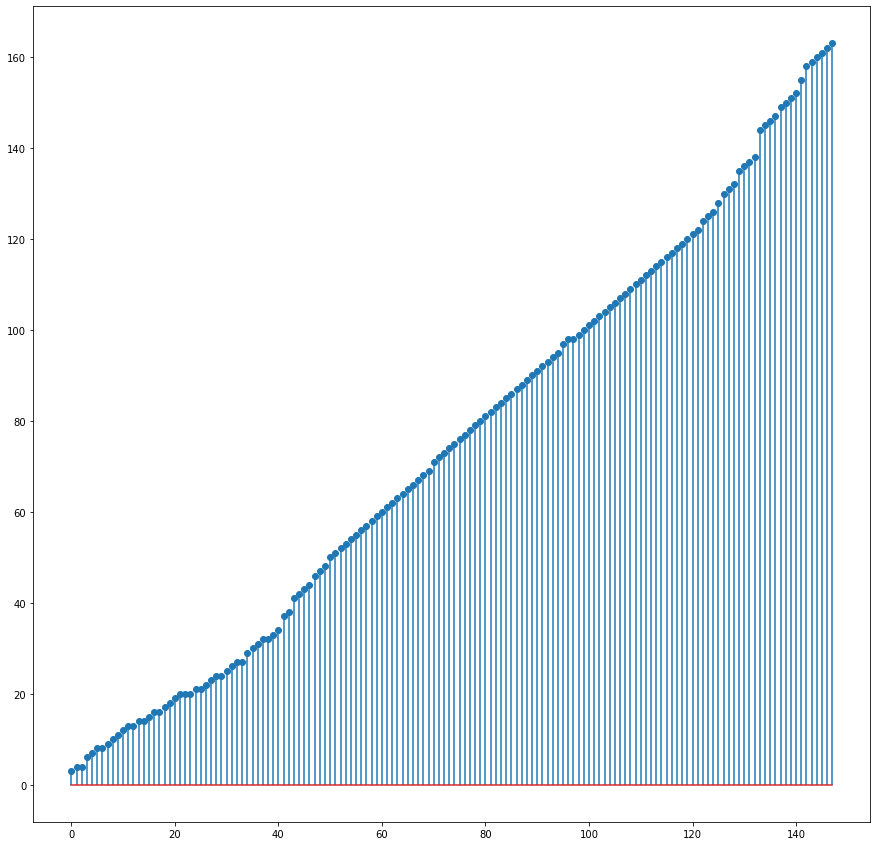

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

# E: the data
y = np.array([52, 145, 84, 161, 85, 152,
       47, 109, 16, 16, 106, 101,
       64, 73, 57, 83, 88, 135,
       119,120,121, 122, 42, 8, 8, 104, 112,
       89, 82, 74, 114, 22, 12,
       21, 21, 67, 71, 93, 94,
       75, 7, 97, 117, 62, 87,
       55, 11, 38, 80, 72, 43,
       50, 86, 31, 108, 24, 24,
       95, 132, 103, 77, 113, 78,
       32, 32, 41, 18, 14, 14,
       79, 66, 65, 81, 105, 53,
       98, 98, 111, 163, 102,
       34, 107, 59, 10, 61, 29,
       46, 4, 4, 30, 37, 76, 44,
       54, 90, 48, 13, 118, 100,
       56, 63, 51, 68, 19, 25,
       23, 13, 110, 26, 17, 33,
       20, 124, 146, 147, 131, 91, 116,
       58, 99, 160, 20, 20, 9,
        6, 115, 69, 136, 92, 128,
       60, 15, 27, 27, 151, 138,
       130, 125, 162, 159, 3, 137,
       155, 144, 126, 158, 149,
       150])

plt.stem(np.sort(y), use_line_collection=True)
plt.show()

/Users/cooke_c/.local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/cooke_c/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


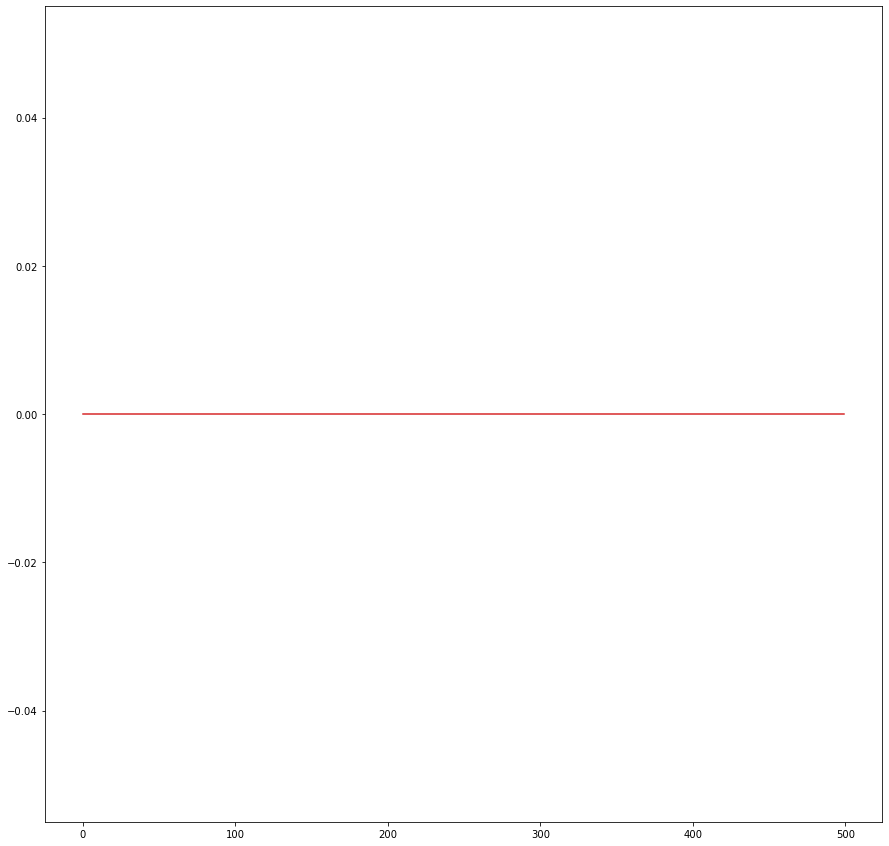

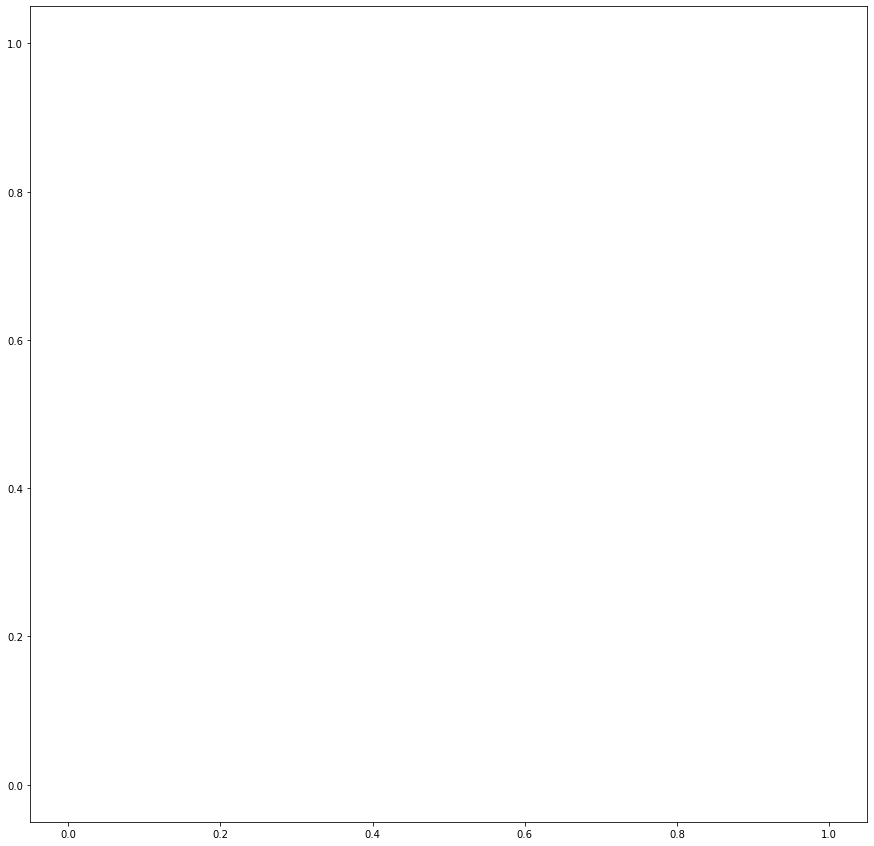

In [2]:
def compute_likelyhood(i,observed):
    if i < observed:
        likelyhood = 0
    else:
        likelyhood = 1.0/i
    return(likelyhood)



posterior = np.ones(500)
posterior/=posterior.sum()


for observed in y:
    for i in range(0,500):
        posterior[i] *= compute_likelyhood(i,observed)

posterior/=posterior.sum()
plt.stem(posterior)
#plt.xlim(150,175)
plt.show()

plt.plot(np.cumsum(posterior))
#plt.xlim(155,170)
#plt.grid()
plt.show()
